In [26]:
import os
import sys
import subprocess
import platform
import json
import networkx as nx
import traceback
from tests.test_learning_journeys import DataStore
from ranking_methods import CommunityDetectionComparison
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import logging
import pandas as pd
import numpy as np
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import itertools

from app import SUBECT_PREFIX

def flatten(list2d):
    return list(itertools.chain.from_iterable(list2d))



# Configure the root logger
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler(sys.stdout)]
)

logger = logging.getLogger(__name__)

data_store = DataStore()
system = platform.system()

In [27]:
data_store.get_chapters()


{'Introduction': [{'text': 'Array data type',
   'href': 'https://en.wikipedia.org/wiki/Array_data_type',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Array data structure',
   'href': 'https://en.wikipedia.org/wiki/Array_data_structure',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Dynamic array',
   'href': 'https://en.wikipedia.org/wiki/Dynamic_array',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Linked list',
   'href': 'https://en.wikipedia.org/wiki/Linked_list',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Doubly linked list',
   'href': 'https://en.wikipedia.org/wiki/Doubly_linked_list',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Stack (abstract data type)',
   'href': 'https://en.w

/var/folders/cn/h1dncc4s0g771b7t4hy7y_000000gn/T/ipykernel_71510/510538644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chapter', y='Link Count', data=data_frame, palette='viridis')


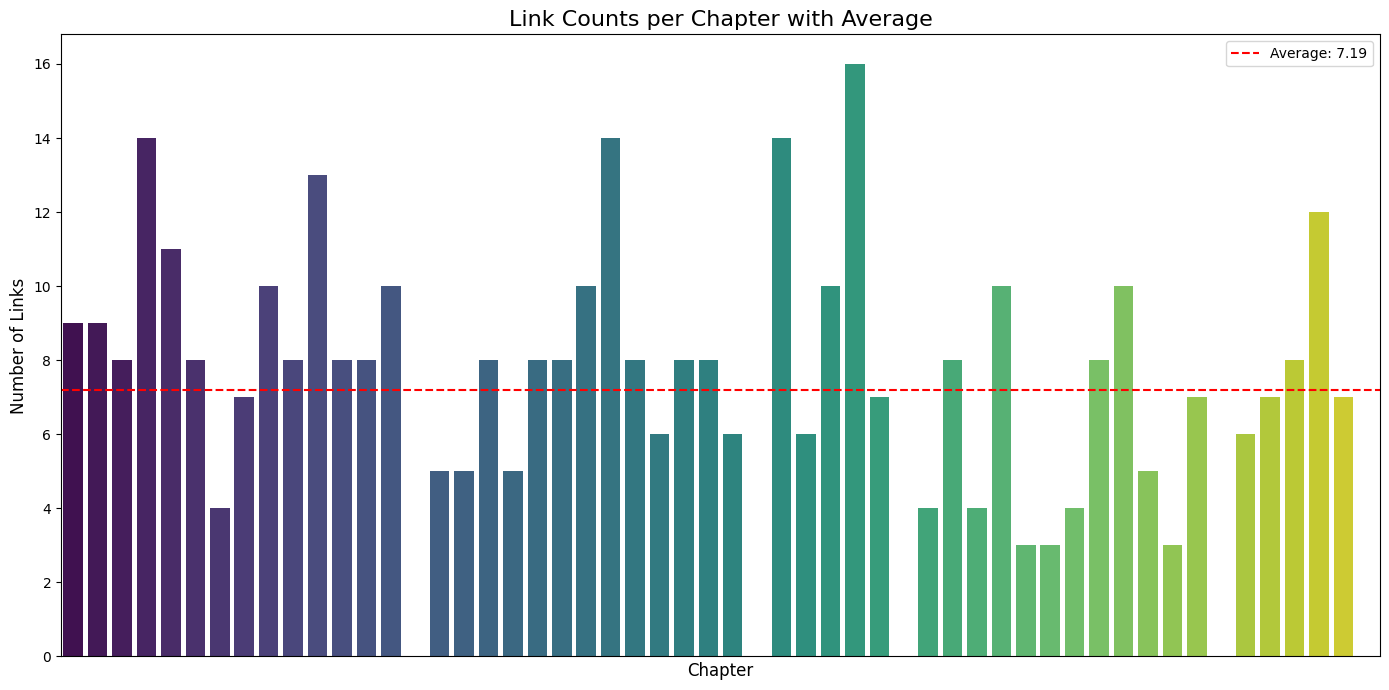

In [28]:
# Recreating the chapter_links data dictionary for link counts calculation
chapter_links = data_store.get_chapters()

# Calculating the number of links per chapter from the dictionary
link_counts = {chapter: len(links) for chapter, links in chapter_links.items()}

# Creating a DataFrame for visualization
data_frame = pd.DataFrame({
    'Chapter': list(link_counts.keys()),
    'Link Count': list(link_counts.values())
})

# Adding the mean value as text on the chart
mean_links = data_frame['Link Count'].mean()

plt.figure(figsize=(14, 7))
sns.barplot(x='Chapter', y='Link Count', data=data_frame, palette='viridis')

# Draw the mean line
plt.axhline(mean_links, color='red', linestyle='--', label=f'Average: {mean_links:.2f}')


# Enhance chart
plt.title('Link Counts per Chapter with Average', fontsize=16)
plt.xlabel('Chapter', fontsize=12)
plt.ylabel('Number of Links', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xticks(ticks=[], labels=[])
plt.legend()
plt.tight_layout()
plt.show()


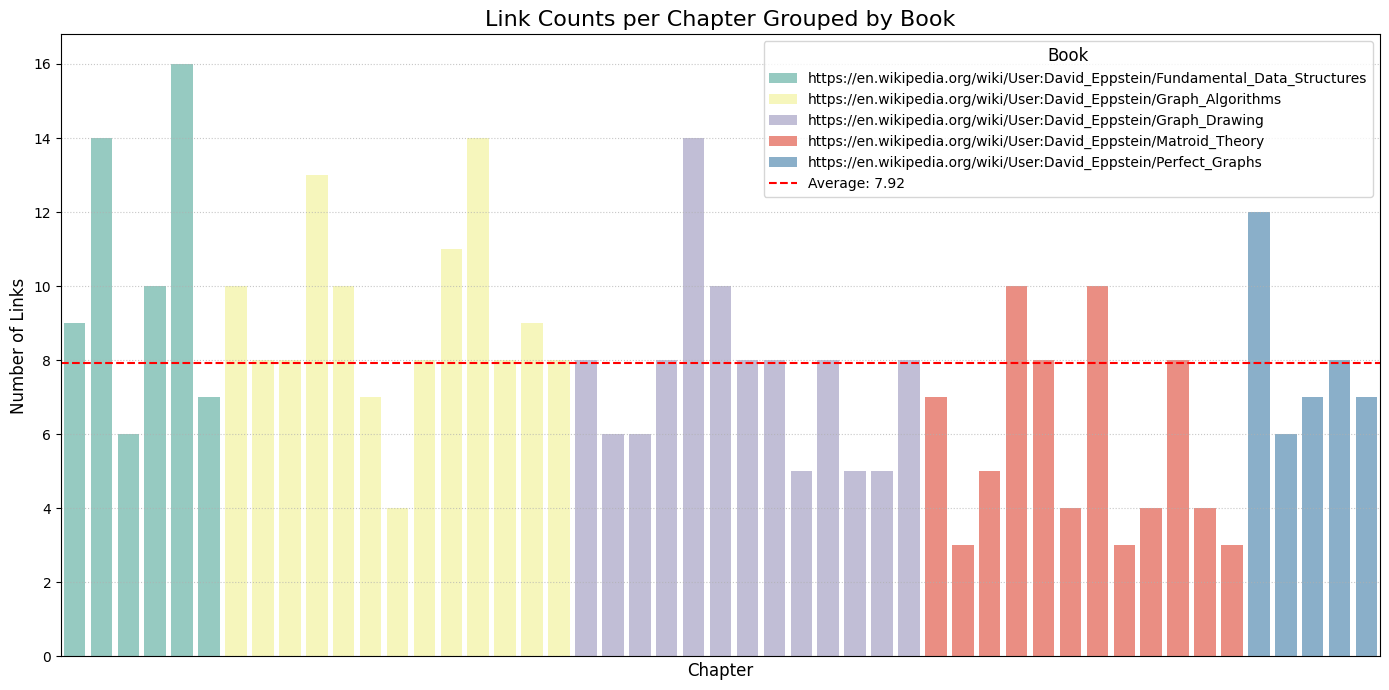

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recreating the chapter_links data dictionary for link counts calculation
chapter_links = data_store.get_chapters()

# Creating a list to store data for the DataFrame
data_list = []

for chapter, links in chapter_links.items():
    book_counts = {}
    total_count = len(links)  # Total count for the chapter
    for link_info in links:
        book = link_info['book']
        book_counts[book] = book_counts.get(book, 0) + 1
    for book, count in book_counts.items():
        data_list.append({
            'Chapter': chapter,
            'Book': book,
            'Link Count': count,
            'Total Count': total_count  # Add total count for each entry
        })

# Creating a DataFrame
data_frame = pd.DataFrame(data_list).sort_values(by='Book')

# Calculate the overall mean using the total count
mean_links = data_frame.groupby('Chapter')['Total Count'].first().mean()

plt.figure(figsize=(14, 7))
sns.barplot(x='Chapter', y='Link Count', hue='Book', data=data_frame, palette='Set3')

# Draw the mean line
plt.axhline(mean_links, color='red', linestyle='--', label=f'Average: {mean_links:.2f}')

# Enhance chart
plt.title('Link Counts per Chapter Grouped by Book', fontsize=16)
plt.xlabel('Chapter', fontsize=12)
plt.ylabel('Number of Links', fontsize=12)
plt.xticks([])
plt.legend(title='Book', fontsize=10, title_fontsize=12, loc='upper right')


plt.grid(True, linestyle=':', alpha=0.7)


plt.tight_layout()

plt.show()